[3, 3, 3, 3]


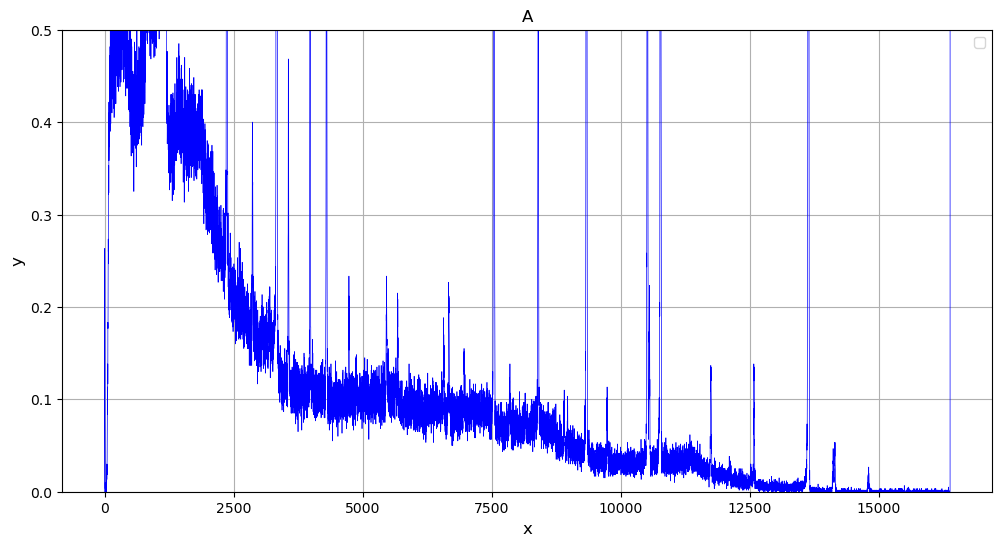

In [10]:
import matplotlib.pyplot as plt # to make plots
import numpy as np # for array manipulation and math functions
import scipy.signal as scs # for signal analysis
import glob # for finding files
import os as os
import warnings
import array as arr
import uncertainties
from scipy import optimize
from scipy.optimize import curve_fit
from uncertainties import ufloat as uf
from uncertainties.umath import *
from uncertainties import unumpy as un
from uncertainties.unumpy import nominal_values as n
from uncertainties.unumpy import std_devs as s
# import fit models from the lmfit package
from lmfit.models import ExponentialModel, GaussianModel, PolynomialModel



####################################################################################################################
#Warnings disabled
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')
#####################################################################################################################
def E_kal(kanal,m,b):
    return m*kanal+b

# def Effizienz(E,A,B,C,D):
#     return (P1+P2*np.log(E)+P4*np.log(E)**3+P5*np.log(E)**4    +P3*np.log(E)**2)/E

# def uEffizienz(E,A,B,C,D):
#     # return (P1+P2*np.log(E)+P4*np.log(E)**3+P5*np.log(E)**4    +P3*np.log(E)**2)/E
#     return A-B*exp(C*(E+D))
def Gausfit_1(winkel,x,y,namena,amplitude,center,sigma,dont_show):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    # print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    figure=plt.figure(figsize=(10,6))
    plt.title('Gaußkurvenfit an das korrigierte Cs-Streuspektrum bei '+str(winkel)+'$^{\circ}$',fontsize=15)
    plt.plot(x1,y1,"b-",linewidth=.2,label="Messwerte",)
    plt.plot(x1,result.best_fit,"r-",label="Gaußkurve",)
    plt.xlabel('Energie [keV]',fontsize=12)
    plt.ylabel('Zählrate',fontsize=12)
    plt.grid()
    plt.legend(fontsize=12)
    plt.savefig(namena+'.png')
    if (dont_show==1):
        plt.close(figure)
    #plt.show
    return lolo1,lala1

def Gausfit_11(x,y,amplitude,center,sigma):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    #print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    return lolo1,lala1,result.best_fit

def Gausfit_2(x,y,amplitude,center,sigma):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_') +
             GaussianModel(prefix='g2_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma,
                            g2_amplitude=amplitude,
                            g2_center=center,
                            g2_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    return lolo1,lala1,result.best_fit

def Gradenfit(x,y):
    anpassungs_werte, co_var = curve_fit(E_kal,x,y)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(E_kal(E, *anpassungs_werte))
    return Rfit

def Gradenfiter(x,y,dy):
    anpassungs_werte, co_var = curve_fit(E_kal,x,y,sigma=dy,absolute_sigma=True,nan_policy='omit')
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(E_kal(E, *anpassungs_werte))
    return Rfit

def Fit(x,y,s,funktion,d_y):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,sigma=d_y,absolute_sigma=True,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

def Fit2(x,y,s,funktion):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

def Fit_smooth(x,y,x_smooth,s,funktion,d_y):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,sigma=d_y,absolute_sigma=True,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x_smooth:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

def coarseBackgroundModel(x_,y_,deg):
    poly_mod = PolynomialModel(deg, prefix='p1_')
    p_bg = poly_mod.guess(y_, x=x_)
    mod_bg = poly_mod
    init_bg = mod_bg.eval(p_bg, x=x_)
    out_bg = mod_bg.fit(y_, p_bg, x=x_)
    return p_bg, out_bg, mod_bg
#Die beiden Funktionen sind leichte Abänderungen von Teilen eines Skriptes zur Auswertung von Radioteleskop-Spektren, das uns im Rahmen 
#eines Praktikum 4 Versuches gegeben wurde
def getSignal(x,y,width_guess,NPeaks,smoothing,signal_range,signal_thr = None):
    s_mask = (x>signal_range[0])&(x<signal_range[1])
    x_s = x[s_mask]
    signal_use = (y)[s_mask]

    if (smoothing == 1):
        b,a = scs.butter(3,0.07)
        zi = scs.lfilter_zi(b, a)
        z, _ = scs.lfilter(b, a, x_s, zi=zi*signal_use[0])
        z2, _ = scs.lfilter(b, a, z, zi=zi*z[0])
        signal_smooth = scs.filtfilt(b, a, signal_use)
    
    else:
       signal_smooth = signal_use

    amp = (np.max(signal_smooth)-np.min(signal_smooth))
    minimum = np.min(signal_smooth)
    
    s_min = signal_range[0]+50
    s_max = signal_range[1]-50
    
    s_mask_narrow = ((x_s>s_min)&(x_s<s_max))
    
    if signal_thr is None:
        peaks = scs.find_peaks(signal_smooth[s_mask_narrow], width=width_guess)
        prom = peaks[1]['prominences']
    else:
        peaks = scs.find_peaks(signal_smooth[s_mask_narrow], height = minimum + signal_thr*amp, width=width_guess)
        prom = peaks[1]['peak_heights']
    prom_save = prom.copy()
    prom.sort()
    
    # only use the most prominent peaks for our first guess of the Gauss peak centers:
    if NPeaks > len(prom): # if not enough peaks are found, reduce NPeaks!
        NPeaks = len(prom)
        print("reduced NPeaks to "+str(NPeaks))
    peaks_use = peaks[0][prom_save>=prom[-NPeaks]] 
    peak_width = peaks[1]['widths'][prom_save>=prom[-NPeaks]]
    # save the peak positions for later
    gauss_centers = x_s[s_mask_narrow][peaks_use]
    peak_y = signal_use[s_mask_narrow][peaks_use]
    return x_s, signal_use, gauss_centers, peak_y, peak_width, signal_smooth

def detailedSignalFit(x_s, signal_use,add_gaussians, gauss_centers, peak_width, center_variation,sigma_min,sigma_max,amp_min,amp_value_guess,y_err=[],poly_deg = 3):
    mask_edges = np.logical_or(x_s<signal_range[0]+50, x_s>signal_range[1]-50)
    if not (poly_deg is None):
        poly1 = PolynomialModel(degree=poly_deg, prefix='p1_')
        p_s = poly1.guess(signal_use[mask_edges],x=x_s[mask_edges])

    # set up the first Gauss peak
    gaussX = GaussianModel(prefix='g'+str(0)+'_')
    gaussians = gaussX
    p_gauss = gaussX.make_params()
    if (poly_deg is None): p_s = p_gauss 
    p_gauss['g'+str(0)+'_center'].set(value=gauss_centers[0], min=gauss_centers[0]-center_variation, max=gauss_centers[0]+center_variation) # center
    p_gauss['g'+str(0)+'_sigma'].set(value=peak_width[0], min=sigma_min, max=sigma_max) # width of peak
    p_gauss['g'+str(0)+'_amplitude'].set(value=amp_value_guess, min=amp_min) # amplitude of peak

    # now set up the rest of the Gauss peaks:
    for i in np.arange(1,len(gauss_centers)):
        gaussX = GaussianModel(prefix='g'+str(i)+'_')
        gaussians = gaussians + gaussX
        p_gauss.update(gaussX.make_params())
        p_gauss['g'+str(i)+'_center'].set(value=gauss_centers[i], min=gauss_centers[i]-center_variation, max=gauss_centers[i]+center_variation)
        p_gauss['g'+str(i)+'_sigma'].set(value=peak_width[i], min=sigma_min, max=sigma_max)
        p_gauss['g'+str(i)+'_amplitude'].set(value=amp_value_guess, min=amp_min)
    
    # add some extra gauss peaks with free parameters to patch up anything left
    for i in np.arange(len(gauss_centers),len(gauss_centers)+add_gaussians):
        gaussX = GaussianModel(prefix='g'+str(i)+'_')
        gaussians = gaussians + gaussX
        p_gauss.update(gaussX.make_params()) 
        p_gauss['g'+str(i)+'_center'].set(min=np.min(x_s)+50, max=np.max(x_s)-50)
        p_gauss['g'+str(i)+'_sigma'].set(min=sigma_min, max=sigma_max)
        p_gauss['g'+str(i)+'_amplitude'].set(min=amp_min)
    
    # assemble the model:  polynomial background + Gauss peaks
    if not (poly_deg is None): mod_s = poly1 + gaussians
    else: mod_s = gaussians
    # include parameters for the Gauss peaks in the parameter list
    p_s.update(p_gauss)
    # initialize model with the parameters
    init_s = mod_s.eval(p_s, x=x_s)
    # fit model
    if (len(y_err)>0):
        out_s = mod_s.fit(signal_use, p_s, x=x_s,weights=1.0/y_err,nan_policy='omit')
    else:
        out_s = mod_s.fit(signal_use, p_s, x=x_s)
    return p_s, out_s, mod_s, gaussians

def Fit_allinone(x,y,N,y_err=[],width=10,center_var=20,s_range=[],amp_guess=50,polydeg=None,ampmin=0,sigmamin=0,sigmamax=500,more_gaus=0,smoothe= 1,return_in_lists=None,one_list=None):
    if not s_range:
        s_range=[x[0],x[len(x)-1]]
    s_mask = (x>s_range[0])&(x<s_range[1])
    if (len(y_err)>0):
        y_errs = y_err[s_mask]
    else:
        y_errs=[]
    x_s, signal_use, gauss_centers, peak_y, peak_width, signal_smooth = getSignal(x,y,width,N, smoothe,s_range,signal_thr= None)
    p_s, out_s, mod_s, mod_s_only = detailedSignalFit(x_s, signal_use,more_gaus, gauss_centers, peak_width,center_var,sigma_min=sigmamin,sigma_max=sigmamax,amp_min=ampmin,amp_value_guess=amp_guess,y_err=y_errs,poly_deg= polydeg)
    lolo1=[]
    lala1=[]
    names=[]
    i=0
    if not (polydeg is None):
        n=polydeg
    else:
        n=-1
    for name,param in out_s.params.items():
        if i>n:
            if out_s.errorbars==True:
                lala1.append(param.stderr)
            else:
                lala1.append(0)
            names.append(name)
            lolo1.append(param.value)
        i=i+1
    i=0
    count=0
    params_list=[list() for x in range(int(len(lolo1)/5))]
    stderr_list=[list() for x in range(int(len(lolo1)/5))]
    centers=[]
    Amplitudes=[]
    centerser=[]
    Amplitudeser=[]
    for h in range(len(lolo1)):
        params_list[i].append(lolo1[h])
        stderr_list[i].append(lala1[h])
        count=count+1
        if (count==5):
            i=i+1
            count=0
    result=out_s.best_fit
    if (return_in_lists is None):
        return p_s,x_s,result,lolo1,lala1,out_s,mod_s,mod_s_only,names,gauss_centers,peak_y
    elif (one_list is None):
        return_other=[gauss_centers,peak_y,names,p_s,mod_s,mod_s_only]
        return_fit=[x_s,result]
        return_fit_results=[params_list,stderr_list,lolo1,lala1,out_s]
        return return_fit,return_fit_results,return_other
    elif not (one_list is None):
        return_list=[x_s,result,lolo1,lala1,out_s,gauss_centers,peak_y,p_s,mod_s,mod_s_only,names]
        return return_list

def Fit_allinone_wocent(x,y,gauss_centers,peak_width,center_var,s_range,amp_guess,y_err=[],polydeg=None,ampmin=0,sigmamin=0,sigmamax=500,more_gaus=0,smoothe= 1):
    #x_s, signal_use, gauss_centers, peak_y, peak_width, signal_smooth = getSignal(x,y,width,N, smoothe,s_range,signal_thr= None)
    s_mask = (x>s_range[0])&(x<s_range[1])
    if (len(y_err)>0):
        y_errs = y_err[s_mask]
    else:
        y_errs=[]
    x_s = x[s_mask]
    y_s = (y)[s_mask]
    p_s, out_s, mod_s, mod_s_only = detailedSignalFit(x_s, y_s,more_gaus, gauss_centers, peak_width,center_var,sigma_min=sigmamin,sigma_max=sigmamax,amp_min=ampmin,amp_value_guess=amp_guess,y_err=y_errs,poly_deg= polydeg)
    lolo1=[]
    lala1=[]
    names=[]
    i=0
    if not (polydeg is None):
        n=polydeg
    else:
        n=-1
    for name,param in out_s.params.items():
        if i>n:
            if out_s.errorbars==True:
                lala1.append(param.stderr)
            else:
                lala1.append(0)
            names.append(name)
            lolo1.append(param.value)
        i=i+1
    result=out_s.best_fit
    return p_s,x_s,result,lolo1,lala1,out_s,mod_s,mod_s_only,names,gauss_centers

def Plotter(X,Y,N_plots,errors=[],figsiz=(12,6),labels=[],colors=[],text=[],linewidths=[],styles=[],markersizes=[],xtitle='x',ytitle='y',title='A',name=None,xrange=None,yrange=None,close=None):
    for n in range(0,N_plots):
        labels.append('')
        colors.append('b')
        linewidths.append(0.5)
        styles.append('-')
        markersizes.append(1)
    figure=plt.figure(figsize=figsiz)
    plt.title(title)
    for i in range(0,N_plots):
        plt.plot(X[i],Y[i],styles[i],color=colors[i],linewidth=linewidths[i],label=labels[i],markersize=markersizes[i])
    if errors:
        plt.errorbar(errors[0],errors[1],errors[3],errors[2],'k.',capsize=1,elinewidth=1,markersize=0,label='')
    plt.xlabel(xtitle,fontsize=12)
    plt.ylabel(ytitle,fontsize=12)
    if text:
        for i in range(len(text[0])):
            plt.text( text[1][i],text[2][i], str(np.round(text[0][i],0)), fontsize = 8)
    if xrange:
        plt.xlim(xrange)
    if not (yrange is None):
        plt.ylim(yrange)
    plt.grid()
    plt.legend()
    if not (name is None):
        plt.savefig(name+'.png')
    if not (close is None):
        plt.close(figure)
    plt.show
    return 0

def ripfromlist(mylist,riplist):
    rippedlist=[]
    for i in range(len(mylist)):
        if i not in riplist:
            rippedlist.append(mylist[i])
    return rippedlist

def jackderripper(mylist,riplist):
    rippedlist=[]
    for i in range(len(mylist)):
        if i in riplist:
            rippedlist.append(mylist[i])
    return rippedlist

def filetoxy(name):
    data=np.loadtxt(name)
    x=data[:,0]
    y=data[:,1]
    y_err=np.zeros(shape=(len(y)))
    # i=0
    # for h in y:
    #     if (h<=0.0):
    #         y_err[i]=0.0
    #     else:
    #         y_err[i]=np.sqrt(h)
    #     i=i+1
    y_err=np.sqrt(y)
    y2=un.uarray(y,y_err)
    return x,y,y2
signal_range=[0,4500]
path1='../data/'
xEu,yEu,yEuer=filetoxy(path1+'Eu-Ge-10.txt')
xCo,yCo,yCoer=filetoxy(path1+'Co-Ge.txt')
xCs,yCs,yCser=filetoxy(path1+'Cs-Ge.txt')
xBg,yBg,yBger=filetoxy(path1+'Hintergrund-Ge.txt')
xuBg,yuBg,yuBger=filetoxy(path1+'Untergrund-langzeit.txt')
masklast=((xEu<16300))# & (xEu>10))


def Tab(names,data,dataer,filename,separat_runden=[]):
    runden=separat_runden
    with open(filename+'.txt', 'w') as f:
        f.write('{l')
        for h in range(0,len(names)-1):
            f.write('|l')
        f.write('}\n')
        for h in range(0,len(names)):
            if not (h==len(names)-1):
                f.write(names[h]+ '&')
            else:
                f.write(names[h]+ '\\\\')
            runden.append(3)
        f.write('\n')
        f.write('\hline')
        f.write('\n')
        count=0
        for i in range(0,len(data)):
            f.write(str(np.round(data[i],runden[count]))+ '\pm'+str(np.round(dataer[i],runden[count])))
            if not (count==(len(names)-1)):
                f.write('&')
            else:
                f.write('\\\\')
                f.write('\n')
                count=-1
            count=count+1
        f.close
    return 0

def get_params(out_s,n):
    lala1=[]
    lolo1=[]
    names=[]
    i=0
    for name,param in out_s.params.items():
        if i>n:
            if out_s.errorbars==True:
                lala1.append(param.stderr)
            else:
                lala1.append(0)
            names.append(name)
            lolo1.append(param.value)
        i=i+1
    return lolo1,lala1,names

def BackgroundVernichter(x_wpeaks,x_wopeaks,y_wopeaks,N_Bgsplit,Bgoverlap):
    x=x_wpeaks
    x2=x_wopeaks
    y2=y_wopeaks
    BG=[]
    BG2=[]
    for i in range(N_Bgsplit):
        mask=((x2>=len(x)*(i/N_Bgsplit-1/(N_Bgsplit*Bgoverlap))) & (x2<len(x)*((i+1)/N_Bgsplit+1/(N_Bgsplit*Bgoverlap))))
        mask2=((x>=len(x)*i/N_Bgsplit) & (x<len(x)*(i+1)/N_Bgsplit))
        mask3=((x2>=len(x)*i/N_Bgsplit) & (x2<len(x)*(i+1)/N_Bgsplit))
        p_bg, out_bg, mod_bg = coarseBackgroundModel(x2[mask],y2[mask],7)  
        background = mod_bg.eval(p_bg,x=x[mask2])
        BG=np.concatenate((BG,background))
        background = mod_bg.eval(p_bg,x=x2[mask3])
        BG2=np.concatenate((BG2,background))
    return BG,BG2

Plotter([xEu],[(yEu)/600],1,yrange=(0,0.5))
# print(datas)
# data1=np.loadtxt(path1+'spectrum.txt')

#p_s,x_s,Rfit,params,params_stderr,result,model,model_gaus,names,gc,py=Fit_allinone(x,y,width=20,N=4,center_var=50,s_range=signal_range,amp_guess=5000,polydeg=3,more_gaus=1)

mylist=[3,3,3,0,3,0]
riplist=[3,5]
print(ripfromlist(mylist,riplist))
# data_x=[x,x_s,gc]
# data_y=[y,Rfit,py]
# Plotter(x,y,3,['spektrum','fit',''],['blue','red','lightgreen'],[1,2,10],['-','-','x'],[0,0,10],'kanal','Anzahl','Voraufgabe','voraufgabe')


In [11]:
x=xEu[masklast]
y=(yEu[masklast]-yBg[masklast])/600
yer=s((yEuer[masklast]-yBger[masklast])/600)
yerrr=(yEuer[masklast]-yBger[masklast])/600
#x_s, signal_use, gauss_centers, peak_y, peak_width, signal_smooth = getSignal(x,y,1,1, 0,[14200,15000],signal_thr= None)
py=[-0.01 for x in range(27)]
# cent=[1179.0, 2369.0, 2862.0, 3333.0, 3559.0, 3982.0, 4300.0, 4733.0, 5462.0, 5676.0, 6568.0, 6665.0, 6964.0, 7543.0, 7853.0, 8402.0, 8907.0, 9335.0, 9736.0, 10515.0, 10555.0, 10770.0, 11745.0, 12579.0, 13638.0, 14116.0,14117.0, 14805.0]
# yranges=[21.891666666666666, 4.575, 0.3933333333333333, 10.598333333333333, 0.46166666666666667, 0.835, 1.03, 0.23, 0.23333333333333334, 0.215, 0.18833333333333332, 0.22666666666666666, 0.155, 1.9583333333333333, 0.13666666666666666, 0.6533333333333333,0.10833333333333334, 1.6366666666666667, 0.11333333333333333, 1.0233333333333334, 0.22166666666666668, 1.3266666666666667, 0.13666666666666666, 0.13833333333333334, 1.4333333333333333, 0.04666666666666667,0.04666666666666667, 0.02666666666666667]
# widths=[10.923773223379612,  12.127571091379195, 13.879032258064626, 12.678768887208207, 12.601785714285597, 13.344343891402787, 13.397280233122729, 15.148809523809177, 18.134502923976584, 11.833333333333371, 13.0, 17.871428571428623, 16.541666666666742, 15.164104638618937, 11.384615384615245, 14.721568627451234, 22.345238095238074, 16.933486622073588, 17.0, 17.333333333333258, 9.861904761904725, 16.94063706563702, 18.57983193277309, 15.0, 40,40,40,40]
cent=[1130,1179.0, 2369.0, 2862.0,3184.61, 3333.0, 3559.0, 3982.0,4027.38, 4300.0, 4733.0,4870.156, 5462.0,5468.439, 5676.0, 6510.116,6568.0, 6665.0, 6964.0, 7543.0, 7853.0,8144.37, 8402.0, 8907.0,8990.77, 9335.0, 9736.0, 10515.0, 10555.0, 10740.5,10770.0, 11745.0,12106.37, 12579.0, 13638.0, 14116.0,14170.0, 14805.0]
yranges=[0.3,21.891666666666666, 4.575, 0.3933333333333333,0.1, 10.598333333333333, 0.46166666666666667, 0.835,0.1 ,1.03, 0.23,0.1, 0.23333333333333334,0.1, 0.215,0.1, 0.18833333333333332, 0.22666666666666666, 0.155, 1.9583333333333333, 0.13666666666666666,0.1, 0.6533333333333333,0.10833333333333334,0.1, 1.6366666666666667, 0.11333333333333333, 1.0233333333333334, 0.22166666666666668,0.1, 1.3266666666666667, 0.13666666666666666,0.1, 0.13833333333333334, 1.4333333333333333, 0.04666666666666667,0.04666666666666667, 0.02666666666666667]
widths=[30,10.923773223379612,  12.127571091379195, 13.879032258064626,13.879032258064626, 12.678768887208207, 12.601785714285597, 13.344343891402787,13.397280233122729, 13.397280233122729, 15.148809523809177, 18.134502923976584, 11.833333333333371, 13.0,13.0, 17.871428571428623,16.541666666666742, 16.541666666666742, 15.164104638618937, 11.384615384615245, 14.721568627451234, 22.345238095238074,14.721568627451234, 16.933486622073588, 17.0,17.0, 17.333333333333258, 9.861904761904725,16.0, 26.94063706563702, 18.57983193277309,15.0, 15.0, 40,40,20,20,40]
#widths=[10.923773223379612, 15.545385202135776, 12.127571091379195, 13.879032258064626, 12.678768887208207, 12.601785714285597, 13.344343891402787, 13.397280233122729, 15.148809523809177, 18.134502923976584, 11.833333333333371, 13.0, 17.871428571428623, 16.541666666666742, 15.164104638618937, 11.384615384615245, 14.721568627451234, 12.345238095238074, 12.345238095238074, 16.933486622073588, 17.0, 17.333333333333258, 9.861904761904725, 16.94063706563702, 18.57983193277309, 15.0, 19.067307692307622, 5.791666666666515, 4.272727272727252]
# 1438.0,15.545385202135776, 0.4716666666666667,
#Plotter([x,cent],[y,yranges],2,colors=['b','r'],styles=['-','x'],markersizes=[0,5],linewidths=[0.5,5],yrange=(0,1))
# for g in peak_y:

#     yranges.append(g)
# for g in peak_width:
#     widths.append(g)

print(len(widths))
print((len(cent)))
ranges=[[cent[x]-2*widths[x],cent[x]+2*widths[x]] for x in range(len(cent))]
x2=x
y2=y

for i in range(len(cent)):#27):
    mask=((x2<ranges[i][0]) | (x2>ranges[i][1]))
    x2=x2[mask]
    y2=y2[mask]
xtp=[x2[x]+x2[len(x2)-1] for x in range(len(x2))]
xneg=[-x2[len(x2)-1-x] for x in range(len(x2))]
xdouble=np.concatenate((xneg,x2,xtp))

print('lbl')
print(len(xdouble)-len(x2))
zeros=np.zeros(len(x2))
ydouble=np.concatenate((zeros,y2,zeros))
N_Bgsplit=20
Bgoverlap=10
BG,BG2=BackgroundVernichter(x,x2,y2,N_Bgsplit,Bgoverlap)
# BG=[]
# BG2=[]
# for i in range(N_Bgsplit):
#     mask=((x2>=len(x)*(i/N_Bgsplit-1/(N_Bgsplit*Bgoverlap))) & (x2<len(x)*((i+1)/N_Bgsplit+1/(N_Bgsplit*Bgoverlap))))
#     mask2=((x>=len(x)*i/N_Bgsplit) & (x<len(x)*(i+1)/N_Bgsplit))
#     mask3=((x2>=len(x)*i/N_Bgsplit) & (x2<len(x)*(i+1)/N_Bgsplit))
#     p_bg, out_bg, mod_bg = coarseBackgroundModel(x2[mask],y2[mask],7)  
#     background = mod_bg.eval(p_bg,x=x[mask2])
#     BG=np.concatenate((BG,background))
#     background = mod_bg.eval(p_bg,x=x2[mask3])
#     BG2=np.concatenate((BG2,background))
#Plotter([x2,x],[y2,BG],2,colors=['b','r'],styles=['-','-'],markersizes=[0,0],linewidths=[2,1])#,yrange=(-0.1,5))
#Plotter([x2,cent],[y2-BG2,py],2,colors=['b','r'],styles=['-','x'],markersizes=[0,5],linewidths=[2,1])#,yrange=(-0.1,5))
do_Gausfits1=1
if ('do_Gausfits1' not in locals()):
    do_Gausfits1=1
    x_s1, signal_use1, gauss_centers1, peak_y1, peak_width1, signal_smooth1 = getSignal(x,y-BG,1,28, 1,[800,15000],signal_thr= None)
    p_s1, out_s1, mod_s1, mod_s_only1 = detailedSignalFit(x_s1, signal_use1,0, cent, widths,20,sigma_min=0,sigma_max=50,amp_min=0,amp_value_guess=50,poly_deg= 0)

#params,params_stderr,namen=get_params(out_s1,-1)
#Tab(['Amplitude','center','sigma','fwhm','heigth'],params,params_stderr,'Tablbl')
#Plotter([x,x_s1],[y-BG,out_s1.best_fit],2,colors=['b','r'],styles=['-','-'],markersizes=[0,0],linewidths=[2,1],yrange=(-0.1,1))

#plt.plot(xtp,y2)
# mask=[ranges-widths,ranges+widths]
signals=[[800,5000],[5000,8500],[8500,11000],[11000,13750],[13750,15000]]
#N_cent=[8,8,6,6]
N_cent=[12,11,8,4,3]
more=[0,0,0,0,0]
print(len(BG))
print(len(x))
# if ('do_Gausfits2' in locals()):
#     del do_Gausfits2
if ('do_Gausfits2' not in locals()):
    do_Gausfits2=1
    N=0
    N1=0
    Rfita=[]
    x_sa=[]
    paramsa=[]
    params_stderra=[]
    lister=[1 for x in range(len(N_cent))]
    for i in range(len(N_cent)):
        N=N+N_cent[i]
        cent2=[cent[h] for h in range(N1,N)]
        print(cent2)
        widths2=[widths[h] for h in range(N1,N)]
        N1=N
        p_s,x_s,Rfit,params,params_stderr,result,model,model_gaus,names,gc=Fit_allinone_wocent(x,y-BG,cent2,widths2,y_err=yer,center_var=30,s_range=signals[i],amp_guess=50,polydeg=0,more_gaus=more[i],sigmamin=0,sigmamax=70,ampmin=0)
        Rfita=np.concatenate((Rfita,Rfit))
        x_sa=np.concatenate((x_sa,x_s))
        paramsa=np.concatenate((paramsa,params))
        params_stderra=np.concatenate((params_stderra,params_stderr))
        lister[i]=result
        print(params_stderr)
        print(result.fit_report(min_correl=0.5))

for i in range(8):
    Plotter([x,x_sa],[y-BG,Rfita],2,colors=['b','r'],styles=['-','-'],close=1,markersizes=[0,0],linewidths=[2,1],yrange=(-0.05,0.5),xrange=(2000*i,2000*(i+1)))

Plotter([x,x_sa],[y-BG,Rfita],2,colors=['b','r'],styles=['-','-'],close=1,markersizes=[0,0],linewidths=[2,1],yrange=(-0.05,0.5),xrange=(14000,15000),name='Gauskurvenmit einemstreich.png')
Plotter([x,x],[y-BG,yer],2,colors=['b','r'],styles=['-','-'],markersizes=[0,0],linewidths=[0.5,0.5],close=1,yrange=(-0.05,0.5),name='Gauskurvenmit einemstreich.png')
#Plotter([x],[y-BG],1,styles=['-','-'],colors=['b','g'],errors=[x,y-BG,np.zeros(shape=(len(x))),yer],yrange=(-0.1,1))
print(lister[1].fit_report(min_correl=0.5))
#print(len(paramsa))
centers_eu=[paramsa[1+5*i] for i in range(int(len(paramsa)/5))]
centers_euer=[params_stderra[1+5*i] for i in range(int(len(paramsa)/5))]
amp_eu=[paramsa[0+5*i] for i in range(int(len(paramsa)/5))]
amp_euer=[params_stderra[0+5*i] for i in range(int(len(paramsa)/5))]
fwhm_eu=[paramsa[3+5*i] for i in range(int(len(paramsa)/5))]
fwhm_euer=[params_stderra[3+5*i] for i in range(int(len(paramsa)/5))]
center_ripper=[0,36]
ceu=ripfromlist(centers_eu,center_ripper)
ceuer=ripfromlist(centers_euer,center_ripper)
fwhm_eu=ripfromlist(fwhm_eu,center_ripper)
fwhm_euer=ripfromlist(fwhm_euer,center_ripper)
fwhm=un.uarray(fwhm_eu,fwhm_euer)
amp_eu=ripfromlist(amp_eu,center_ripper)
amp_euer=ripfromlist(amp_euer,center_ripper)
amp=un.uarray(amp_eu,amp_euer)
print(centers_euer)
#params,params_stderr,namen=get_params(out_s1,-1)
Tab(['Amplitude','center','sigma','fwhm','heigth'],paramsa,params_stderra,'Tablbl')
#print(centers_eu)
#

38
38
lbl
27558
16300
16300
[[Model]]
    (Model(polynomial, prefix='p1_') + ((((((((((Model(gaussian, prefix='g0_') + Model(gaussian, prefix='g1_')) + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_')) + Model(gaussian, prefix='g4_')) + Model(gaussian, prefix='g5_')) + Model(gaussian, prefix='g6_')) + Model(gaussian, prefix='g7_')) + Model(gaussian, prefix='g8_')) + Model(gaussian, prefix='g9_')) + Model(gaussian, prefix='g10_')))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 668
    # data points      = 3499
    # variables        = 34
    chi-square         = 3629.95391
    reduced chi-square = 1.04760575
    Akaike info crit   = 196.562842
    Bayesian info crit = 406.010747
    R-squared          = 0.98519600
[[Variables]]
    p1_c0:         -0.00141608 +/- 2.2144e-04 (15.64%) (init = 0.01453192)
    g0_amplitude:   1.28015286 +/- 0.24481034 (19.12%) (init = 50)
    g0_center:      5460.60972 +/- 0.56387154 (0.01%) (init = 5462)
    g0_s

0

[0.014832995359635602, 0.03630411994525515, 0.3137079218347184, 1.8989319552076633, 0.022349929105382006, 0.19031759993838912, 0.10707460163528655, 1.0997101920714834, 0.09138602465146965, 0.46577181659572875, 0.9367222606697609, 0.5638715442208262, 4.92290528222519, 0.4428341770901003, 4.684814617497757, 0.5941616275990421, 0.3528437539722897, 0.598827556203339, 0.057064917106682315, 0.8691487843610608, 1.2056829218438168, 0.1189436003980331, 0.7707710502391103, 0.8782025364742002, 0.06456732651499549, 0.47177993614840275, 0.08800909861735817, 0.2753374223285207, 2.28297641651289, 0.09019869722571695, 0.30653410643587853, 2.2617836234364432, 0.25666820026420667, 0.07229157048491126, 0.6266611619338387, 0.8801159599170855]
38
36
156.73
Durch die Anpassung bestimmte Parameter: [ 9.68641846 -1.6860378 ] +/- [3.26943356e-05 1.51818049e-02] nm
Durch die Anpassung bestimmte Parameter: [ 9.68703689 -2.42354269] +/- [9.52161060e-04 1.04155269e+00] nm
Durch die Anpassung bestimmte Parameter: [

0

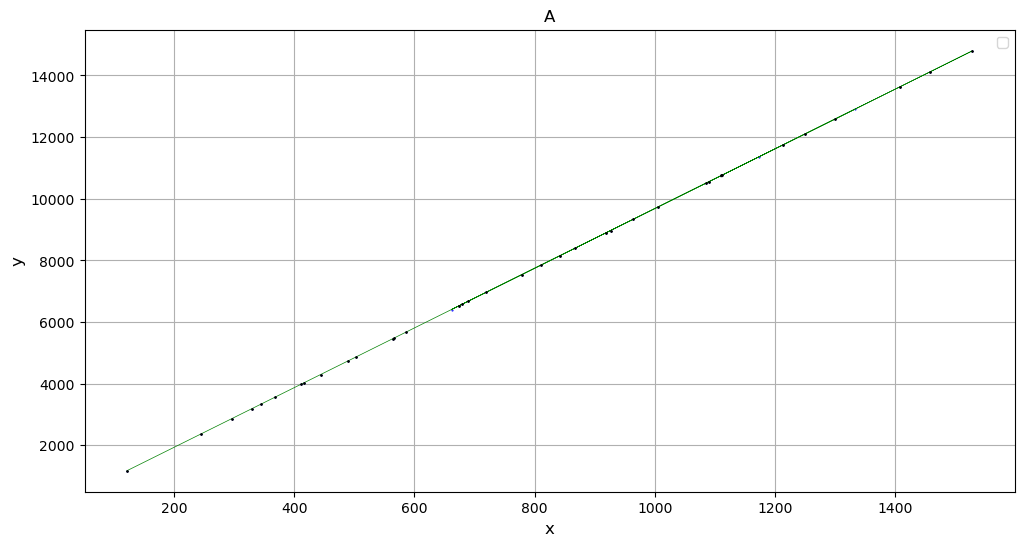

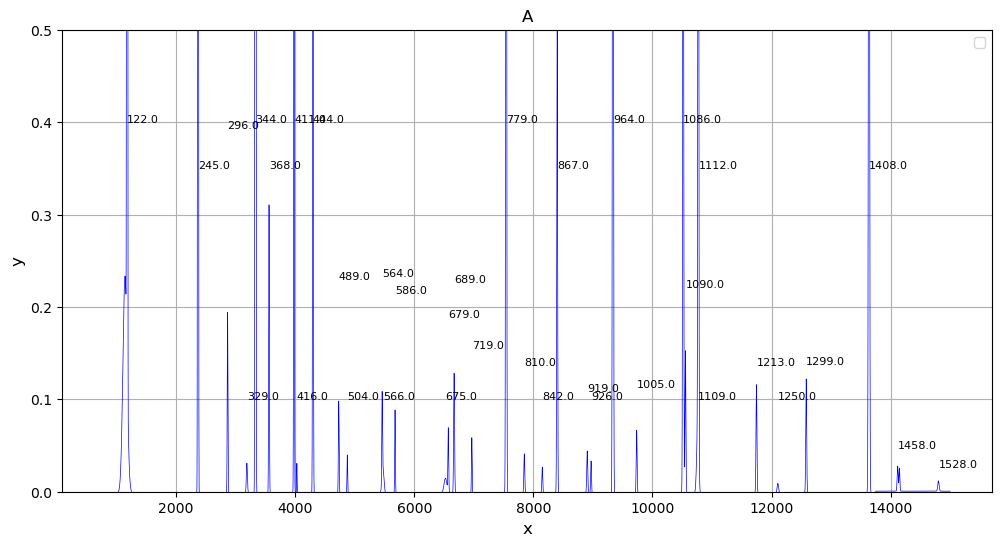

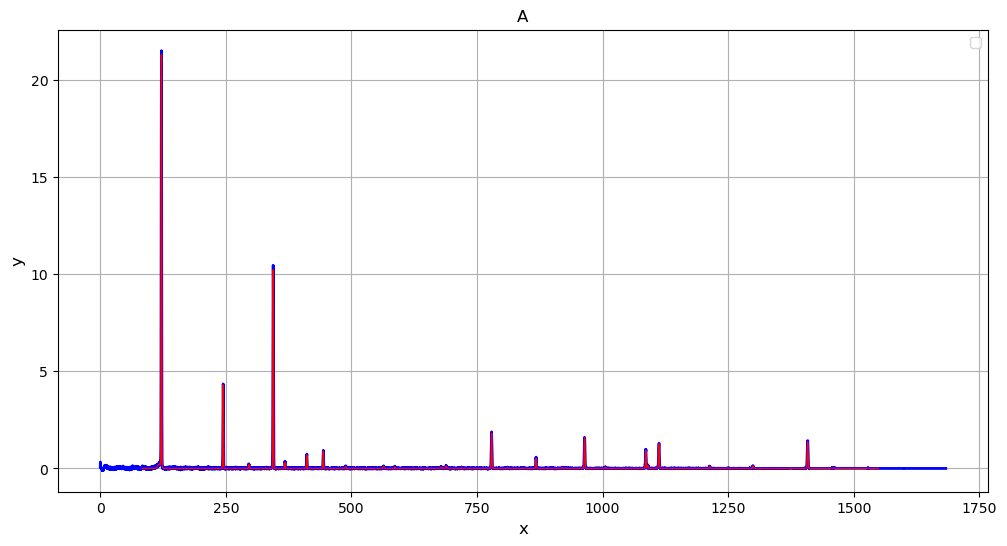

In [12]:
# if ('do_Gausfits2' in locals()):
#     del do_Gausfits2
E_list1=[661.7,1173.2,1332.5]
#E_list_Eu=[121.78,244.697,295.939,344.278,367.789,411.117,443.961,488.679,563.986,586.265,678.623,688.67,719.346,778.904,810.451,867.380,919.337,964.057,1005.27,1085.837,1089.737,1112.076,1212.948,1299.142,1408.013,1457.643,1528.1]
E_list_Eu=[121.8,244.7,295.9,329.4,344.3,367.8,411.1,416.0,444.0,488.7,503.5,564.0,566.4,586.3,674.6,678.6,688.7,719.3,778.9,810.5,841.6,867.4,919.3,926.3,964.1,1005.3,1085.5,1089.7,1109.2,1112.1,1212.9,1250.0,1299.1,1408.0,1457.6,1528.1]
E_rel=[28.53,7.55,0.44,0.12,26.59,0.86,2.24,0.11,2.83,0.41,0.15,0.49,0.13,0.46,0.14,0.47,0.86,0.25,12.93,0.32,0.17,4.23,0.42,0.27,14.51,0.66,10.11,1.73,0.19,13.67,1.42,0.19,1.63,20.87,0.50,0.28]
# center_ripper=[0,36]
# ceu=ripfromlist(centers_eu,center_ripper)
# ceuer=ripfromlist(centers_euer,center_ripper)
print(ceuer)
print(len(centers_eu))
print(len(E_list_Eu))
print(np.sum(E_rel))
x=xEu[masklast]
y=(yEu[masklast])/600#-yBg[masklast])/600
xu=xuBg[masklast]
yu=(yuBg[masklast])
xbg=xBg[masklast]
ybg=(yBg[masklast])/600
x1=xCs[masklast]
y1=n((yCser[masklast]*2-yBger[masklast])/600)
y1er=s((yCser[masklast]*2-yBger[masklast])/600)
x2=xCo[masklast]
y2=n(((yCoer[masklast])*2-yBger[masklast])/600)
y2er=s(((yCoer[masklast])*2-yBger[masklast])/600)
fit_Cs,param_Cs,l=Fit_allinone(x1,y1,1,y_err=y1er,width=3,center_var=50,s_range=[5000,16000],amp_guess=50,polydeg=3,sigmamax=50,return_in_lists=1)
fit_Co,param_Co,l=Fit_allinone(x2,y2,2,y_err=y2er,width=3,center_var=50,s_range=[5000,16000],amp_guess=50,polydeg=4,sigmamax=50,return_in_lists=1)
centers_CsCo=[param_Cs[0][0][1],param_Co[0][0][1],param_Co[0][1][1]]
centers_CsCoer=[param_Cs[1][0][1],param_Co[1][0][1],param_Co[1][1][1]]
ceu1=np.concatenate((ceu,centers_CsCo))
ceu1er=np.concatenate((ceuer,centers_CsCoer))
E=np.concatenate((E_list_Eu,E_list1))
fit=Gradenfiter(E,ceu1,ceu1er)
Plotter([E,E],[ceu1,fit],2,styles=['.','-'],colors=['b','g'],errors=[E_list_Eu,ceu,np.zeros(shape=(len(E_list_Eu))),ceuer])
peaks_y=[]
upper_y=0.5
i=0
for yr in yranges:
    if (yr*1.1 >= upper_y):
        peaks_y.append(upper_y*(0.8+0.1*np.cos(np.pi/2*i)))
    else:
        peaks_y.append(yr)
    i=i+1
peaks_y=ripfromlist(peaks_y,center_ripper)
fit_CoCs=Gradenfit(E_list1,centers_CsCo)
fit2=Fit_smooth(centers_CsCo,E_list1,centers_eu,[0.1,0],E_kal,centers_CsCoer)
print(fit2)
Plotter([x_sa],[Rfita],1,colors=['b','r'],styles=['-','-'],text=[E_list_Eu,ceu,peaks_y],yrange=(0,upper_y),markersizes=[0,0],linewidths=[0.5,0.5],name='Gauskurvenmit einemstreich.png')
#Plotter([x_sa],[Rfita],1,colors=['b','r'],styles=['-','-'],close=1,text=[fit2,centers_eu,peaks_y],yrange=(0,upper_y),markersizes=[0,0],linewidths=[0.5,0.5],name='Gauskurvenmit einemstreich.png')
# Plotter([centers_CsCo,centers_eu],[E_list1,fit2],2,styles=['x','-'],close=1,markersizes=[5,0],colors=['b','r'])
# Plotter([x1,fit_Cs[0]],[y1,fit_Cs[1]],2,colors=['b','r'],close=1,yrange=(0,1))
# Plotter([x2,fit_Co[0]],[y2,fit_Co[1]],2,colors=['b','r'],close=1,yrange=(0,0.2))
yeet=[[1,1,1],[2,2,2]]
if yeet:
    print(yeet)
def Ek(x):
    m=uf(9.68641846,3.26943356e-05)
    b=uf(1.6860378,1.51818049e-02)
    y=(x+b)/m
    return y
Plotter([n(Ek(x)),n(Ek(x_sa))],[y-BG,Rfita],2,colors=['b','r'],styles=['-','-'],markersizes=[0,0],linewidths=[2,1])


Durch die Anpassung bestimmte Parameter: [0.04895276 1.2044003 ] +/- [0.00027603 0.00408143] nm
Durch die Anpassung bestimmte Parameter: [0.00238397 1.45262417] +/- [2.69374089e-05 9.81098759e-03] nm
Durch die Anpassung bestimmte Parameter: [0.00238197 1.45307067] +/- [2.69405131e-05 9.81129797e-03] nm
2423.8633333333337
2358.1+/-2.0


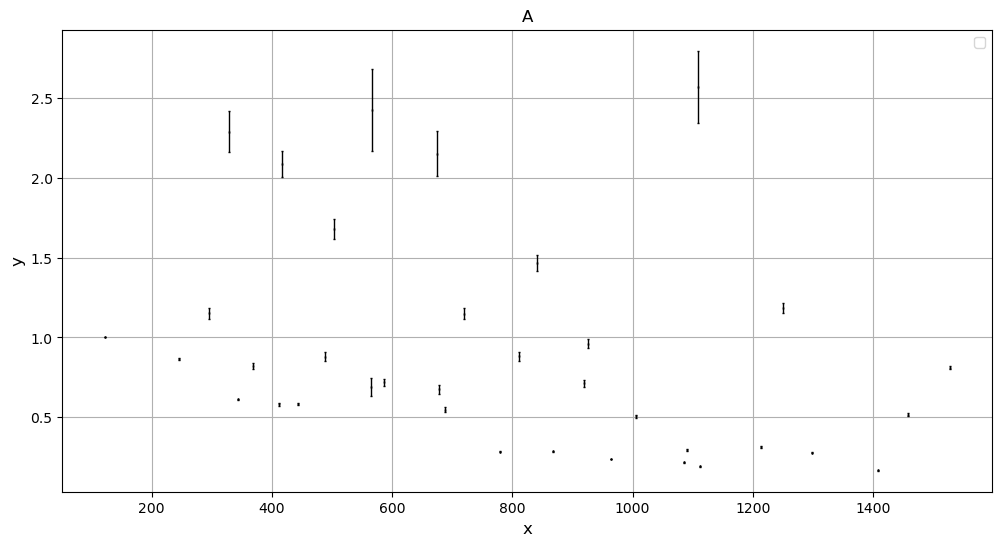

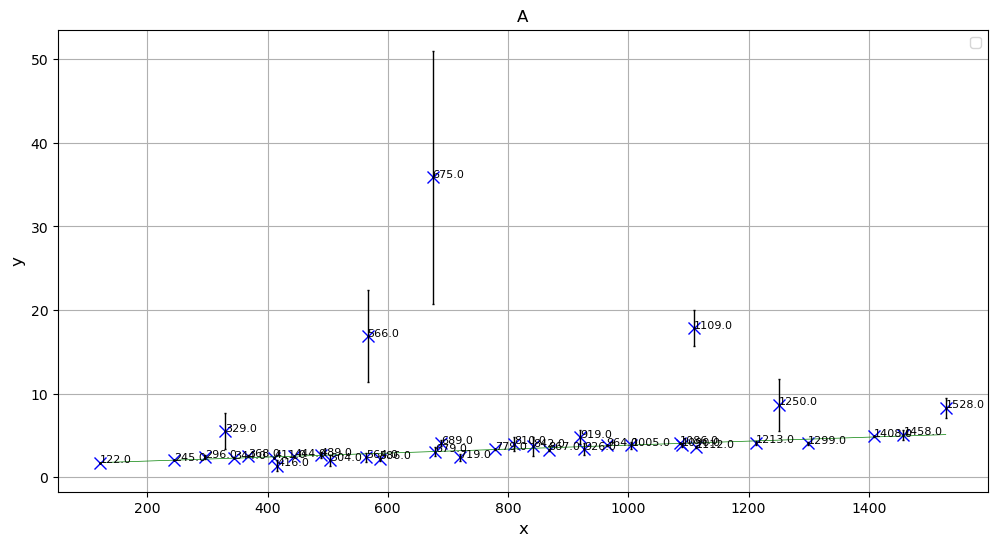

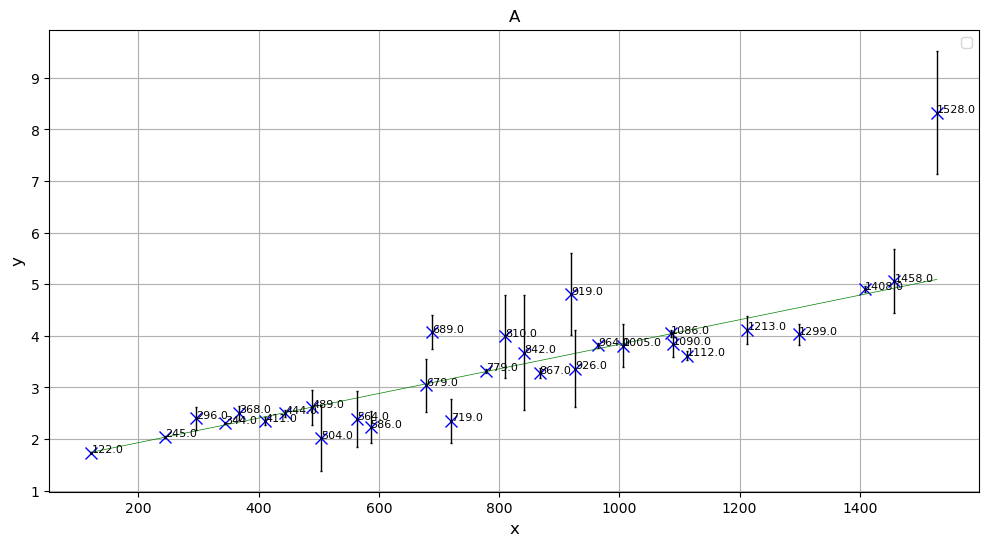

In [14]:
fwhminE=Ek(fwhm)
ampinE=Ek(amp)
rel=un.uarray(E_rel,np.zeros(shape=(len(E_rel))))
eff=ampinE*rel[0]/(rel*ampinE[0])
Plotter([],[],0,errors=[E_list_Eu,n(eff),np.zeros(shape=(len(eff))),s(eff)])
def Eres(x,m,b):
    return np.sqrt((m**2*x+b**2))
fit=Fit(E_list_Eu,n(fwhminE),[1,0],Eres,s(fwhminE))
fwhminE=fwhminE**2
fit=Gradenfiter(E_list_Eu,n(fwhminE),s(fwhminE))
Plotter([E_list_Eu,E_list_Eu],[n(fwhminE),fit],2,text=[E_list_Eu,E_list_Eu,n(fwhminE)],styles=['x','-'],markersizes=[8],colors=['b','g'],errors=[E_list_Eu,n(fwhminE),np.zeros(shape=(len(E_list_Eu))),s(fwhminE)])
ripper2=[3,7,12,14,28,31]
fwhminE=un.uarray(ripfromlist(n(fwhminE),ripper2),ripfromlist(s(fwhminE),ripper2))
E_list_Eu1=ripfromlist(E_list_Eu,ripper2)
fit=Gradenfiter(E_list_Eu1,n(fwhminE),s(fwhminE))
Plotter([E_list_Eu1,E_list_Eu1],[n(fwhminE),fit],2,text=[E_list_Eu1,E_list_Eu1,n(fwhminE)],styles=['x','-'],markersizes=[8],colors=['b','g'],errors=[E_list_Eu1,n(fwhminE),np.zeros(shape=(len(E_list_Eu1))),s(fwhminE)])
print(np.sum(y))
print(sum(yerrr))
kerr=np.zeros(shape=(len(y)))
for x in range(len(y)):
    kerr[x]=y[x]

[10.923773223379612, 12.127571091379195, 13.879032258064626, 12.678768887208207, 12.601785714285597, 13.344343891402787, 13.397280233122729, 15.148809523809177, 18.134502923976584, 11.833333333333371, 13.0, 17.871428571428623, 16.541666666666742, 15.164104638618937, 11.384615384615245, 14.721568627451234, 12.345238095238074, 12.345238095238074, 16.933486622073588, 17.0, 17.333333333333258, 9.861904761904725, 16.94063706563702, 18.57983193277309, 15.0, 40, 40, 40]
lbl
28876


c:\Users\Banton\anaconda3\Lib\site-packages\lmfit\models.py:312: RankWarning: Polyfit may be poorly conditioned
  out = np.polyfit(x, data, self.poly_degree)
c:\Users\Banton\anaconda3\Lib\site-packages\lmfit\models.py:312: RankWarning: Polyfit may be poorly conditioned
  out = np.polyfit(x, data, self.poly_degree)
c:\Users\Banton\anaconda3\Lib\site-packages\lmfit\models.py:312: RankWarning: Polyfit may be poorly conditioned
  out = np.polyfit(x, data, self.poly_degree)
c:\Users\Banton\anaconda3\Lib\site-packages\lmfit\models.py:312: RankWarning: Polyfit may be poorly conditioned
  out = np.polyfit(x, data, self.poly_degree)
c:\Users\Banton\anaconda3\Lib\site-packages\lmfit\models.py:312: RankWarning: Polyfit may be poorly conditioned
  out = np.polyfit(x, data, self.poly_degree)
c:\Users\Banton\anaconda3\Lib\site-packages\lmfit\models.py:312: RankWarning: Polyfit may be poorly conditioned
  out = np.polyfit(x, data, self.poly_degree)
c:\Users\Banton\anaconda3\Lib\site-packages\lmfit\mo

[[Model]]
    (Model(polynomial, prefix='p1_') + (((((((((((((((((((((((((((Model(gaussian, prefix='g0_') + Model(gaussian, prefix='g1_')) + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_')) + Model(gaussian, prefix='g4_')) + Model(gaussian, prefix='g5_')) + Model(gaussian, prefix='g6_')) + Model(gaussian, prefix='g7_')) + Model(gaussian, prefix='g8_')) + Model(gaussian, prefix='g9_')) + Model(gaussian, prefix='g10_')) + Model(gaussian, prefix='g11_')) + Model(gaussian, prefix='g12_')) + Model(gaussian, prefix='g13_')) + Model(gaussian, prefix='g14_')) + Model(gaussian, prefix='g15_')) + Model(gaussian, prefix='g16_')) + Model(gaussian, prefix='g17_')) + Model(gaussian, prefix='g18_')) + Model(gaussian, prefix='g19_')) + Model(gaussian, prefix='g20_')) + Model(gaussian, prefix='g21_')) + Model(gaussian, prefix='g22_')) + Model(gaussian, prefix='g23_')) + Model(gaussian, prefix='g24_')) + Model(gaussian, prefix='g25_')) + Model(gaussian, prefix='g26_')) + Model(gaussian, p

C:\Users\Banton\AppData\Local\Temp\ipykernel_15912\290659963.py:311: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


0

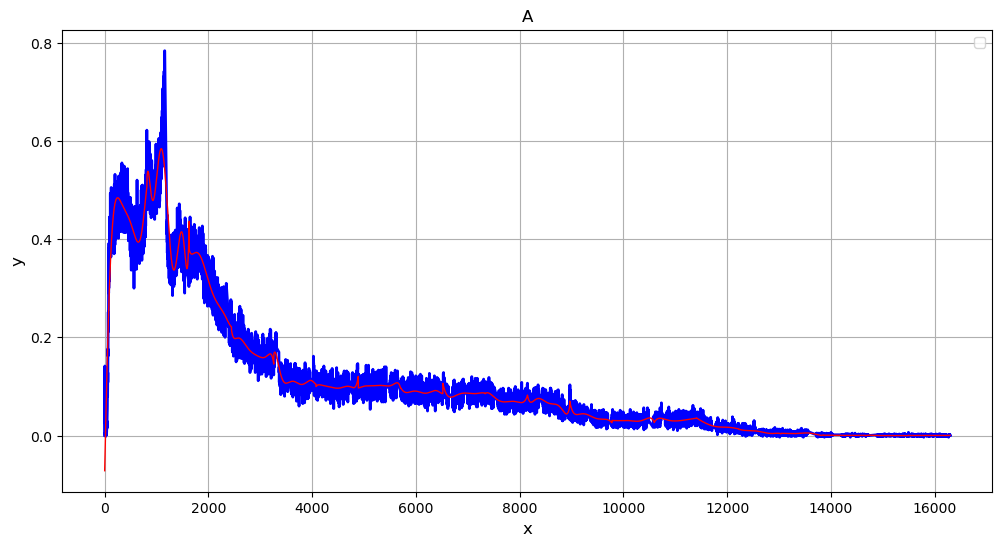

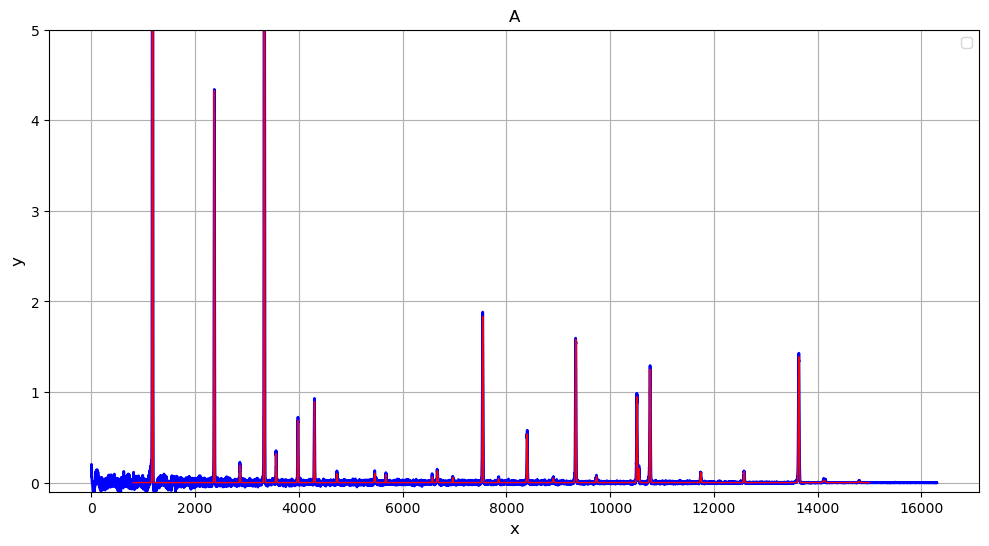

In [ ]:
x=xEu[masklast]
y=(yEu[masklast]-yBg[masklast])/600
#x_s, signal_use, gauss_centers, peak_y, peak_width, signal_smooth = getSignal(x,y,1,1, 0,[14200,15000],signal_thr= None)
py=[0.01*x for x in range(29)]
cent=[1179.0, 2369.0, 2862.0, 3333.0, 3559.0, 3982.0, 4300.0, 4733.0, 5462.0, 5676.0, 6568.0, 6665.0, 6964.0, 7543.0, 7853.0, 8402.0, 8905.0, 8910.0, 9335.0, 9736.0, 10515.0, 10555.0, 10770.0, 11745.0, 12579.0, 13638.0, 14116.0, 14805.0]
yranges=[21.891666666666666, 4.575, 0.3933333333333333, 10.598333333333333, 0.46166666666666667, 0.835, 1.03, 0.23, 0.23333333333333334, 0.215, 0.18833333333333332, 0.22666666666666666, 0.155, 1.9583333333333333, 0.13666666666666666, 0.6533333333333333,0.10833333333333334, 1.6366666666666667, 0.11333333333333333, 1.0233333333333334, 0.22166666666666668, 1.3266666666666667, 0.13666666666666666, 0.13833333333333334, 1.4333333333333333, 0.04666666666666667, 0.02666666666666667]
#widths=[10.923773223379612, 15.545385202135776, 12.127571091379195, 13.879032258064626, 12.678768887208207, 12.601785714285597, 13.344343891402787, 13.397280233122729, 15.148809523809177, 18.134502923976584, 11.833333333333371, 13.0, 17.871428571428623, 16.541666666666742, 15.164104638618937, 11.384615384615245, 14.721568627451234, 12.345238095238074, 12.345238095238074, 16.933486622073588, 17.0, 17.333333333333258, 9.861904761904725, 16.94063706563702, 18.57983193277309, 15.0, 19.067307692307622, 5.791666666666515, 4.272727272727252]
widths=[10.923773223379612,  12.127571091379195, 13.879032258064626, 12.678768887208207, 12.601785714285597, 13.344343891402787, 13.397280233122729, 15.148809523809177, 18.134502923976584, 11.833333333333371, 13.0, 17.871428571428623, 16.541666666666742, 15.164104638618937, 11.384615384615245, 14.721568627451234, 22.345238095238074, 16.933486622073588, 17.0, 17.333333333333258, 9.861904761904725, 16.94063706563702, 18.57983193277309, 15.0, 40,40,40]
# 1438.0,15.545385202135776, 0.4716666666666667,
#Plotter([x,cent],[y,yranges],2,colors=['b','r'],styles=['-','x'],markersizes=[0,5],linewidths=[0.5,5],yrange=(0,1))
# for g in peak_y:
#     yranges.append(g)
# for g in peak_width:
#     widths.append(g)

print(widths)
ranges=[[cent[x]-2*widths[x],cent[x]+2*widths[x]] for x in range(28)]
x2=x
y2=y

for i in range(28):
    mask=((x2<ranges[i][0]) | (x2>ranges[i][1]))
    x2=x2[mask]
    y2=y2[mask]
xtp=[x2[x]+x2[len(x2)-1] for x in range(len(x2))]
xneg=[-x2[len(x2)-1-x] for x in range(len(x2))]
xdouble=np.concatenate((xneg,x2,xtp))

print('lbl')
print(len(xdouble)-len(x2))
zeros=np.zeros(len(x2))
ydouble=np.concatenate((zeros,y2,zeros))
N_Bgsplit=20
BG=[]
for i in range(N_Bgsplit):
    mask=((x2>=len(x)*(i/N_Bgsplit)) & (x2<len(x)*(i+1)/N_Bgsplit))
    mask2=((x>=len(x)*i/N_Bgsplit) & (x<len(x)*(i+1)/N_Bgsplit))
    p_bg, out_bg, mod_bg = coarseBackgroundModel(x2[mask],y2[mask],7)  
    background = mod_bg.eval(p_bg,x=x[mask2])
    BG=np.concatenate((BG,background))
Plotter([x2,x],[y2,BG],2,colors=['b','r'],styles=['-','-'],markersizes=[0,0],linewidths=[2,1])#,yrange=(-0.1,5))
if ('do_Gausfits' not in locals()):
    do_Gausfits=1
    x_s1, signal_use1, gauss_centers1, peak_y1, peak_width1, signal_smooth1 = getSignal(x,y-BG,1,28, 1,[800,15000],signal_thr= None)
    p_s1, out_s1, mod_s1, mod_s_only1 = detailedSignalFit(x_s1, signal_use1,0, cent, widths,20,sigma_min=0,sigma_max=50,amp_min=0,amp_value_guess=50,poly_deg= 0)
print(out_s1.fit_report(min_correl=0.5))
Plotter([x,x_s1],[y-BG,out_s1.best_fit],2,colors=['b','r'],styles=['-','-'],markersizes=[0,0],linewidths=[2,1],yrange=(-0.1,5))